In [1]:
.libPaths("/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library")

In [2]:
library(ggplot2)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
all_row_ag_rate <- data.frame()
all_row_res_num <- data.frame()
for(idx in seq(1,50)){
    res_stat <- read.table(paste0("/disk1/wenqing/tmp_data/PFC_s2/test_filter_in_snv_opc/filter_idx",idx,"/regular.res.txt"))
    this_row_ag_rate <- c(idx,res_stat[13,3],res_stat[6,3]+res_stat[7,3])
    this_row_res_num <- c(idx,res_stat[13,2],res_stat[14,2])
    all_row_ag_rate <- rbind(all_row_ag_rate,this_row_ag_rate)
    all_row_res_num <- rbind(all_row_res_num,this_row_res_num)
}


In [13]:
colnames(all_row_ag_rate) <- c('filter_index','AG_TC','CT_GA')
colnames(all_row_res_num) <- c('filter_index','AG_TC_num','Total_res_num')

In [5]:
write.table(all_row_ag_rate,"/disk1/wenqing/tmp_data/PFC_s2/test_filter_in_snv_opc/res_stats_accordToSNVCov.txt",quote=F,sep='\t',row.names=F)
write.table(all_row_res_num,"/disk1/wenqing/tmp_data/PFC_s2/test_filter_in_snv_opc/res_num_accordToSNVCov.txt",quote=F,sep='\t',row.names=F)

In [14]:
head(all_row_res_num)

,filter_index,AG_TC_num,Total_res_num
,<int>,<int>,<int>
1,1,4691,8356
2,2,3597,5489
3,3,3108,4096
4,4,2803,3388
5,5,2614,3018
6,6,2404,2708


In [15]:
all_data <- cbind(all_row_ag_rate[,1:2],all_row_res_num[,3]) 
colnames(all_data) <- c('filter_index','AG_TC','Total_res_num')
head(all_data)

,filter_index,AG_TC,Total_res_num
,<dbl>,<dbl>,<int>
1,1,56.14,8356
2,2,65.53,5489
3,3,75.88,4096
4,4,82.73,3388
5,5,86.61,3018
6,6,88.77,2708


In [16]:
# 假设这是你想要标记的数据点对应的filter_index值
points_to_label <- 10
coeff <- max(all_data$Total_res_num)/100

# 使用all_data子集来获取对应filter_index的AG_TC和Total_res_num的值
label_data <- all_data %>%
  filter(filter_index %in% points_to_label) %>%
  mutate(Total_res_num_scaled = Total_res_num / coeff)

label_data

filter_index,AG_TC,Total_res_num,Total_res_num_scaled
<dbl>,<dbl>,<int>,<dbl>
10,91.92,1967,23.53997


In [17]:
1967/8356

[1] 0.2353997

In [9]:
AG_ratio_Color <- "#69b3a2"
total_res_num_Color <- rgb(0.2, 0.6, 0.9, 1)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


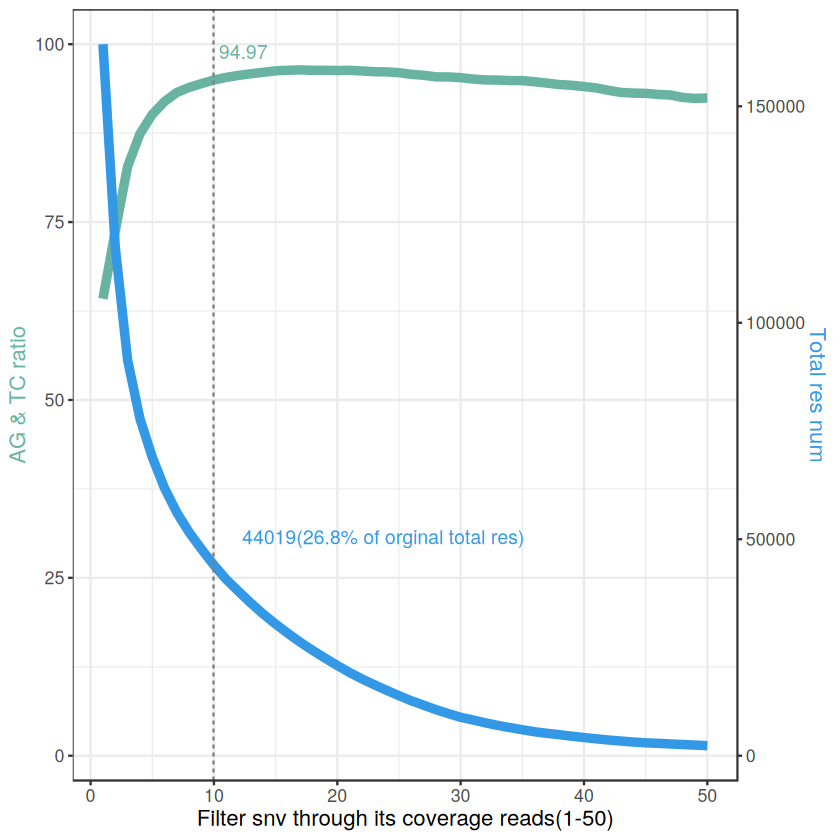

In [11]:

# 添加标签到图中
ggplot(all_data, aes(x=filter_index)) +
  
  geom_line(aes(y=AG_TC), size=2, color=AG_ratio_Color) + 
  geom_line(aes(y=Total_res_num / coeff), size=2, color=total_res_num_Color) +
  geom_vline(xintercept = 10, color = "grey50", linetype="dashed") + # 添加垂直线
  
  
  geom_text(data=label_data, aes(x=filter_index, y=AG_TC, label=sprintf("%.2f", AG_TC)), 
            vjust=-1.5, hjust=-0.1, color=AG_ratio_Color, size=4) + # 为AG_TC比添加标签
  geom_text(data=label_data, aes(x=filter_index, y=Total_res_num_scaled, label="44019(26.8% of orginal total res)"), 
            vjust=-1.5, hjust=-0.1, color=total_res_num_Color, size=4) + # 为总残基数量添加标签
  
  scale_y_continuous(
    name = "AG & TC ratio",
    sec.axis = sec_axis(~.*coeff, name="Total res num")
  ) + 
  
  theme_bw() +
  
  theme(
    axis.title.y = element_text(color = AG_ratio_Color, size=13),
    axis.title.y.right = element_text(color = total_res_num_Color, size=13),
    text = element_text(size = 13)
  ) +
  xlab('Filter snv through its coverage reads(1-50)')  
